### Oppgave 1a
Vi skal bruke feilforplantningsformelen for å estimere forventningsverdien og variansen av $G$, notert som $\mu_g = E[G]$ og $\sigma_g^2 = \text{Var}[G]$.

Gitt at:
$$ G = \frac{2S}{T^2} $$

og under antakelsen at $S$ og $T$ er uavhengige stokastiske variabler, har vi:
$$ \mu_g = E\left[\frac{2S}{T^2}\right] \approx \frac{2\mu_s}{\mu_t^2} $$
$$ \sigma_g^2 = \text{Var}\left[\frac{2S}{T^2}\right] \approx \frac{4\mu_s^2}{\mu_t^4}\sigma_t^2 + \frac{4}{\mu_t^2}\sigma_s^2 $$


In [8]:
# Gitt verdier
mu_s = 241.3  # målt verdi for s
mu_t = 7.02   # målt verdi for t
sigma_s = 2   # usikkerhet i s
sigma_t = 1   # usikkerhet i t

# Beregning av mu_g og sigma_g^2
mu_g = 2 * mu_s / mu_t**2
sigma_g_squared = (4 * mu_s**2 / mu_t**4) * sigma_t**2 + (4 / mu_t**2) * sigma_s**2
sigma_g = sigma_g_squared**0.5

print(f"Tilnærmet forventningsverdi for g, mu_g: {mu_g} m/s^2")
print(f"Tilnærmet varians for g, sigma_g^2: {sigma_g_squared} m/s^2")
print(f"Tilnærmet standardavvik for g, sigma_g: {sigma_g} m/s^2")


Tilnærmet forventningsverdi for g, mu_g: 9.792939992370194 m/s^2
Tilnærmet varians for g, sigma_g^2: 96.22634638350858 m/s^2
Tilnærmet standardavvik for g, sigma_g: 9.809502861180508 m/s^2


### Oppgave 1b
Vi simulerer $n = 10000$ realisasjoner av $G$ ved å anta at $S$ og $T$ er normalfordelte stokastiske variabler. Deretter beregner vi empiriske estimater for $\mu_g$ og $\sigma_g$ basert på simuleringene, og sammenligner disse med beregningene fra deloppgave a).

For å vurdere om $G$ er normalfordelt, plotter vi et sannsynlighetshistogram av simulerte verdier og sammenligner dette med den teoretiske normalfordelingen basert på de simulerte dataene.


Simulert forventningsverdi for g, mu_g_sim: 10.388013486702071 m/s^2
Simulert standardavvik for g, sigma_g_sim: 3.3059573902461485 m/s^2


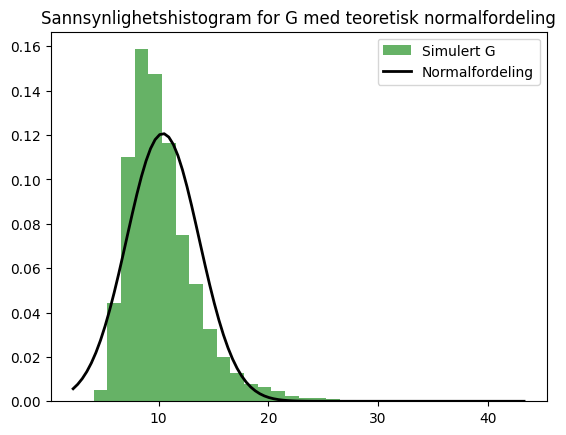

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Simulere n = 10000 realisasjoner av G
n = 10000
S_sim = np.random.normal(mu_s, sigma_s, n)
T_sim = np.random.normal(mu_t, sigma_t, n)
G_sim = 2 * S_sim / T_sim**2

# Beregne empiriske estimater for mu_g og sigma_g
mu_g_sim = np.mean(G_sim)
sigma_g_sim = np.std(G_sim)

# Sammenligne og diskutere resultatene
print(f"Simulert forventningsverdi for g, mu_g_sim: {mu_g_sim} m/s^2")
print(f"Simulert standardavvik for g, sigma_g_sim: {sigma_g_sim} m/s^2")

# Plotte sannsynlighetshistogram og normalfordeling
plt.hist(G_sim, bins=30, density=True, alpha=0.6, color='g', label='Simulert G')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-(x - mu_g_sim)**2 / (2 * sigma_g_sim**2)) / (sigma_g_sim * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2, label='Normalfordeling')
plt.title('Sannsynlighetshistogram for G med teoretisk normalfordeling')
plt.legend()
plt.show()
